   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


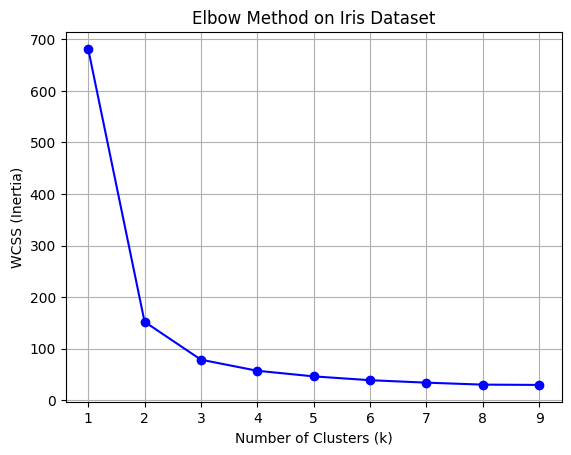


Silhouette Scores (higher is better)
k = 2 -> Silhouette Score =  0.6810
k = 3 -> Silhouette Score =  0.5512
k = 4 -> Silhouette Score =  0.4975
k = 5 -> Silhouette Score =  0.4887
k = 6 -> Silhouette Score =  0.4443
k = 7 -> Silhouette Score =  0.4584
k = 8 -> Silhouette Score =  0.3060
k = 9 -> Silhouette Score =  0.2777


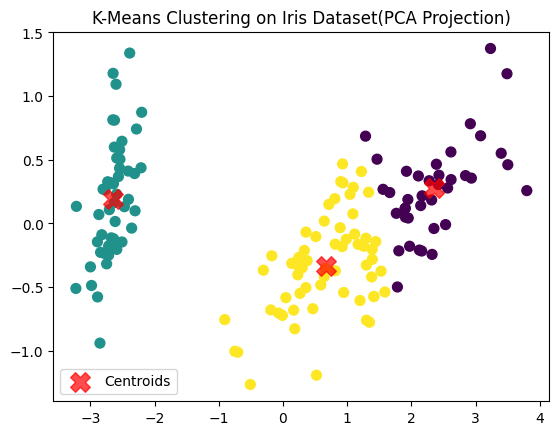

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#loading iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(X, columns = feature_names)
print(df.head())

wcss = []

#trying k from 1-9 and storing the wcss for each
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method on Iris Dataset')
plt.grid(True)
plt.show()
 #Evaluate clustering quality using silhouette Score for each K
print("\nSilhouette Scores (higher is better)")
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=45)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X,labels)
    print(f"k = {k} -> Silhouette Score = {score: .4f}")

#Apply kmeans with the optima number of clusters (K=3 for Iris)
kmeans = KMeans(n_clusters=3,random_state=45)
y_kmeans = kmeans.fit_predict(X)

#visualize the clustered data in 2-D using PCA (for human understanding)
pca = PCA(n_components=2) #reduce dimensions from 4-D to 2-D
X_pca = pca.fit_transform(X) #Project the feature dat in 2-D

#plot the dta points with their predicted clusters
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_kmeans,cmap='viridis',s=50)

#project the cluster centres into 2-D space for virtualisation
centres_pca = pca.transform(kmeans.cluster_centers_)

#plot the centriods with red X marks
plt.scatter(centres_pca[:,0],centres_pca[:,1],c = 'red',s=200,alpha=0.7,marker='X',label = 'Centroids')
plt.title("K-Means Clustering on Iris Dataset(PCA Projection)")
plt.legend()
plt.show()